In [1]:
import numpy as np
import pandas as pd
from stochastic_regression_imputation import sri

In [165]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def plot_imputation(original_data, imputed_data, target_column, feature_column):

    """
    Plot observed data, imputed data, and regression line.

    Parameters:
        original_data (pd.DataFrame): The original dataset with missing values.
        imputed_data (pd.DataFrame): The dataset after imputation.
        target_column (str): The name of the column with missing values.
        feature_column (str): The name of the feature column to use for plotting.
    """
    # Extract the necessary columns
    x = original_data[[feature_column]].values
    y = original_data[target_column].values
    imputed_y = imputed_data[target_column].values
    missing_mask = original_data[target_column].isna()

    # Fit a linear regression model to the observed data
    reg = LinearRegression().fit(x[~missing_mask], y[~missing_mask])
    x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_pred = reg.predict(x_range)

    # Plot the data
    plt.figure(figsize=(12, 8))

    # Plot all data points
    # plt.scatter(x, y, color='white', label='Original Data (Including Missing)', marker='o', alpha=0.5)
    
    # Highlight observed data
    plt.scatter(x[~missing_mask], y[~missing_mask], color='blue', label='Observed Data', marker='o', alpha=0.8)

    # Highlight imputed data with original true values
    plt.scatter(x[missing_mask], imputed_y[missing_mask], color='yellow', label='Imputed Data', marker='x', alpha=0.8)
    # plt.scatter(x[missing_mask], y[missing_mask], color='green', label='True Values for Missing Data', marker='x', alpha=0.8, s=100, edgecolor='black')

    # Regression line
    plt.plot(x_range, y_pred, color='black', linestyle='--', label='Regression Line')
    
    plt.xlabel(feature_column)
    plt.ylabel(target_column)
    plt.title('Observed and Imputed Data with Regression Line')
    plt.legend()
    plt.grid(True)
    plt.show()

In [166]:
whiteside = pd.read_csv('../whiteside.csv', index_col=0, header=0)

In [167]:
whiteside.head()

,Insul,Temp,Gas
1,Before,-0.8,7.2
2,Before,-0.7,6.9
3,Before,0.4,6.4
4,Before,2.5,6.0
5,Before,2.9,5.8


In [168]:
whiteside["Gas"].values

array([7.2, 6.9, 6.4, 6. , 5.8, 5.8, 5.6, 4.7, 5.8, 5.2, 4.9, 4.9, 4.3,
       4.4, 4.5, 4.6, 3.7, 3.9, 4.2, 4. , 3.9, 3.5, 4. , 3.6, 3.1, 2.6,
       4.8, 4.6, 4.7, 4. , 4.2, 4.2, 4.1, 4. , 3.5, 3.2, 3.9, 3.5, 3.7,
       3.5, 3.5, 3.7, 3.5, 3.4, 3.7, 4. , 3.6, 3.7, 2.8, 3. , 2.8, 2.6,
       2.7, 2.8, 1.3, 1.5])

In [169]:
whiteside.isna().sum()

Insul    0
Temp     0
Gas      0
dtype: int64

In [170]:
whiteside.isna().any()

Insul    False
Temp     False
Gas      False
dtype: bool

In [171]:
whiteside["GasWithNA"] = whiteside["Gas"]
missing_indices = np.random.choice(whiteside.index, size=20,replace=False)
missing_indices

array([44, 18,  1, 46, 30, 48, 54, 36, 21, 14, 34, 52, 43, 11, 37, 35, 55,
       51,  9, 53])

In [172]:
whiteside.loc[missing_indices, "GasWithNA"] = np.nan
whiteside.head(40)

,Insul,Temp,Gas,GasWithNA
1,Before,-0.8,7.2,NaN
2,Before,-0.7,6.9,6.9
3,Before,0.4,6.4,6.4
4,Before,2.5,6.0,6.0
5,Before,2.9,5.8,5.8
6,Before,3.2,5.8,5.8
7,Before,3.6,5.6,5.6
8,Before,3.9,4.7,4.7
9,Before,4.2,5.8,NaN
10,Before,4.3,5.2,5.2


In [173]:
whiteside.shape

(56, 4)

In [174]:
imputed_data = sri(whiteside[['Temp', 'GasWithNA']], "GasWithNA")

In [161]:
imputed_data.shape

(56, 2)

In [162]:
imputed_df = pd.DataFrame(imputed_data, columns=['Temp', 'GasWithNA'])
imputed_df['Gas'] = whiteside["Gas"]
imputed_df['Insul'] = whiteside["Insul"]


In [163]:
plot_imputation(whiteside, 'GasWithNA', 'Temp',imputed_df.values)


ValueError: Buffer has wrong number of dimensions (expected 1, got 3)

In [43]:
hishape(whiteside)

NameError: name 'shape' is not defined

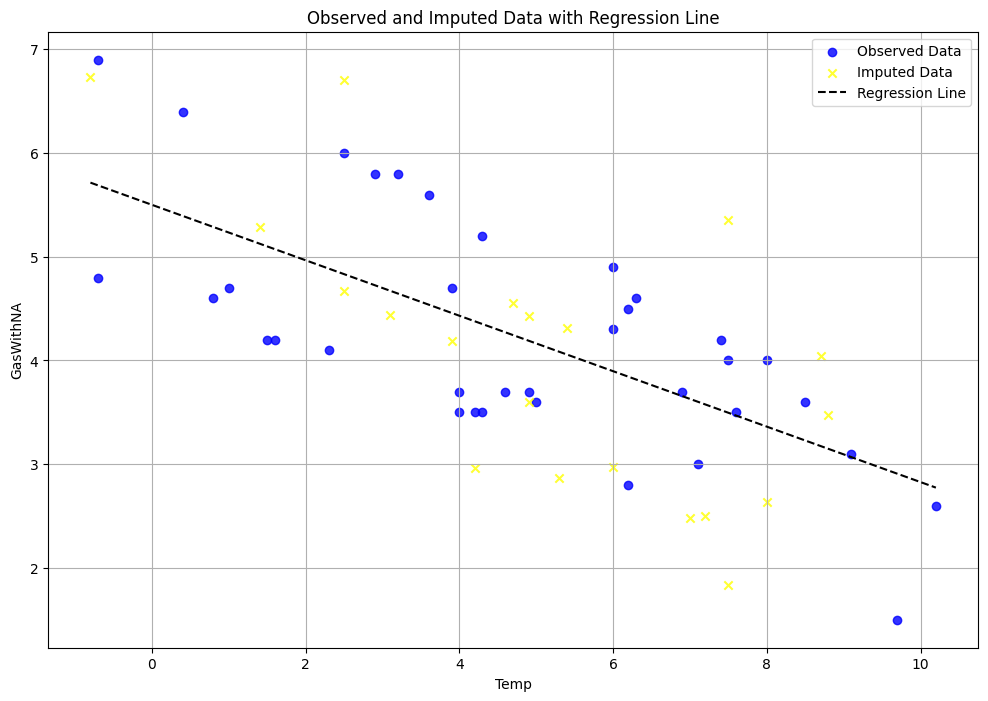

In [175]:
plot_imputation(whiteside, imputed_data, 'GasWithNA', 'Temp')


In [86]:
imputed_data

,Temp,GasWithNA
0,-0.8,4.918928
1,-0.7,6.900000
2,0.4,5.579292
3,2.5,5.197319
4,2.9,5.800000
5,3.2,5.800000
6,3.6,5.600000
7,3.9,5.516479
8,4.2,5.800000
9,4.3,4.736886


In [87]:
whiteside.head()

,Insul,Temp,Gas,GasWithNA
1,Before,-0.8,7.2,NaN
2,Before,-0.7,6.9,6.9
3,Before,0.4,6.4,NaN
4,Before,2.5,6.0,NaN
5,Before,2.9,5.8,5.8
6,Before,3.2,5.8,5.8
7,Before,3.6,5.6,5.6
8,Before,3.9,4.7,NaN
9,Before,4.2,5.8,5.8
10,Before,4.3,5.2,NaN
